<a href="https://colab.research.google.com/github/Ayantika1998/Assignments/blob/main/Python__EDA_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis 
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 3: Visualization

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn. 

In [44]:
import pandas as pd
ti = pd.read_csv('titanic.csv')
ti.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [45]:
ti.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


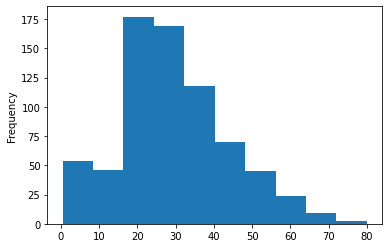

In [46]:
ti['age'].plot(kind='hist');


Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn. 

## How do I use seaborn to visualize data?

In [47]:
import seaborn as sns


### Checks for emptiness and cleanse data

In [48]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [49]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [50]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


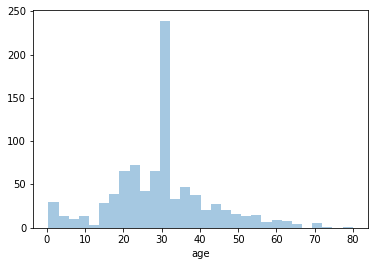

In [51]:
sns.distplot(ti['age'], kde=False);


##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


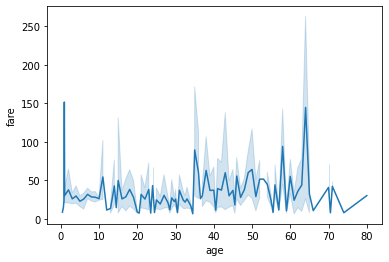

In [52]:
sns.lineplot(ti['age'], ti['fare'])


## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`... 

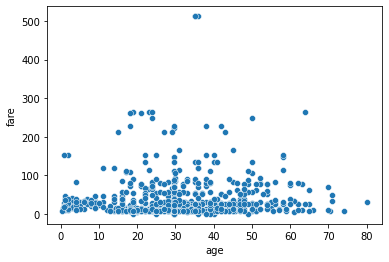

In [53]:
sns.scatterplot(data=ti, x='age', y='fare')


## How do I create a distribution plot?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


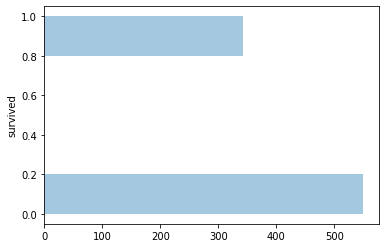

In [54]:
sns.distplot(ti['survived'], vertical=True, kde=False)


## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column... 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


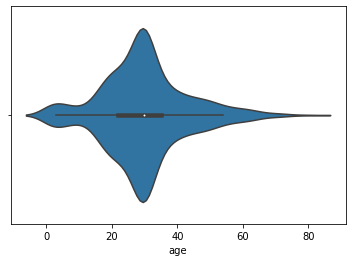

In [55]:
sns.violinplot(ti['age'])


## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


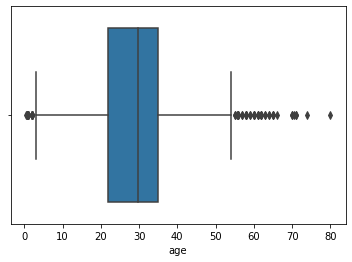

In [56]:
sns.boxplot(ti['age'])


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

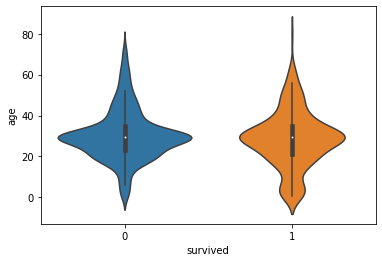

In [57]:
sns.violinplot(data=ti, x='survived', y='age')


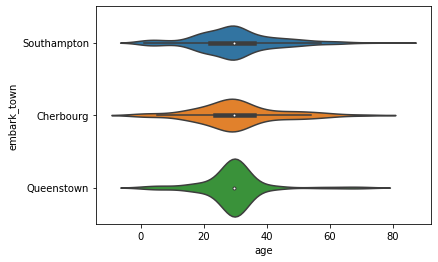

In [58]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

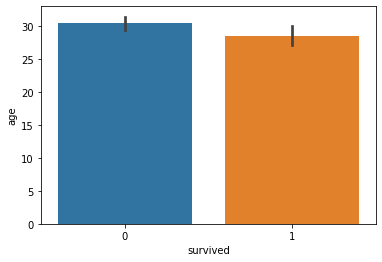

In [59]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

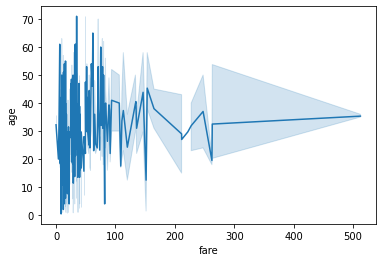

In [60]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

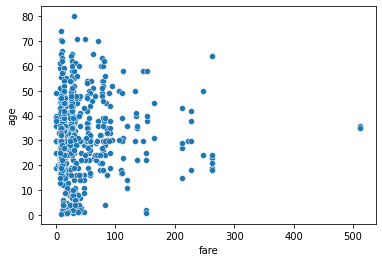

In [61]:
sns.scatterplot(data=ti, x='fare', y='age');


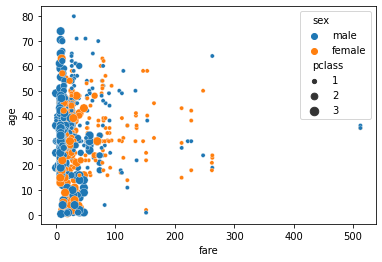

In [62]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individual, try a few plots

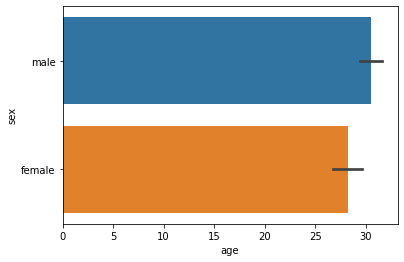

In [70]:
sns.barplot(data=ti, x='age',y='sex')

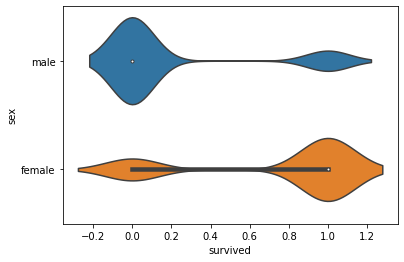

In [71]:
sns.violinplot(data=ti, x='survived', y='sex')

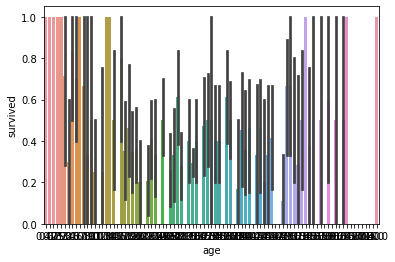

In [75]:
sns.barplot(data=ti, x='age', y='survived')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


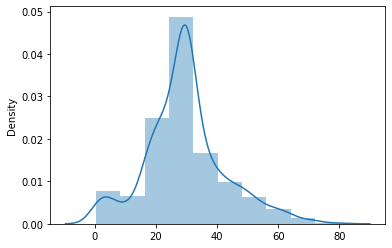

In [77]:
import seaborn as sns
sns.distplot(x = ti['age'], bins = 10)

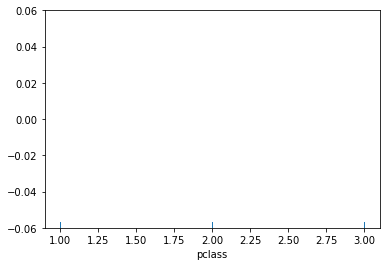

In [79]:
sns.rugplot(x = ti['pclass'])

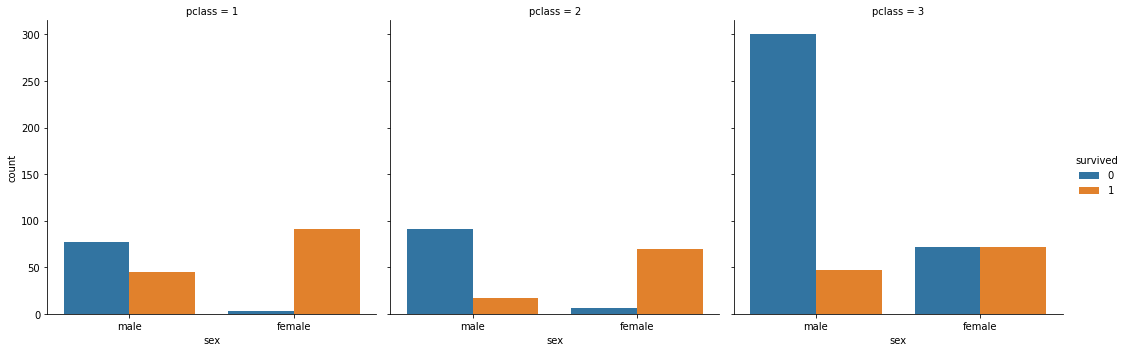

In [81]:
sns.catplot(x ='sex', hue ='survived',
kind ='count', col ='pclass', data = ti)

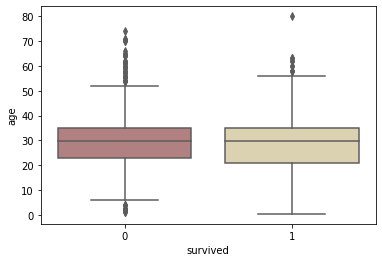

In [82]:
sns.boxplot(x='survived',y='age',data=ti,palette='pink')

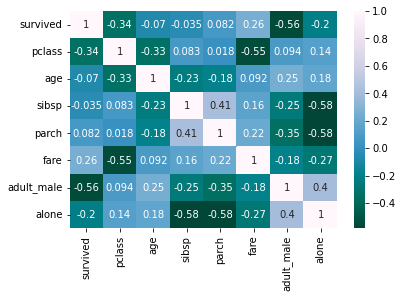

In [84]:
corr = ti.corr()
sns.heatmap(corr, annot=True, cmap='PuBuGn_r')

## Step 2 (25 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


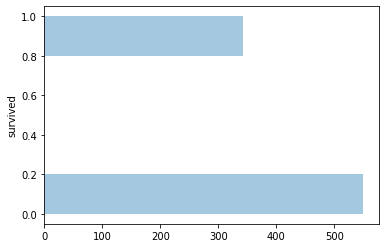

In [89]:
sns.distplot(ti['survived'], vertical=True, kde=False)

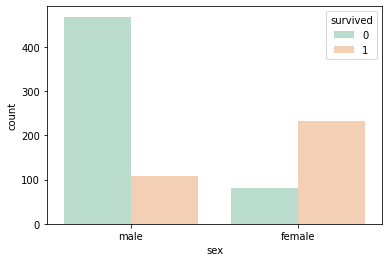

In [86]:
sns.countplot(x ="sex", hue ="survived", data = ti,palette = "Pastel2")

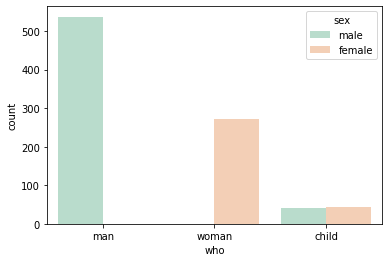

In [91]:
sns.countplot(x ="who", hue ="sex", data = ti,palette = "Pastel2")

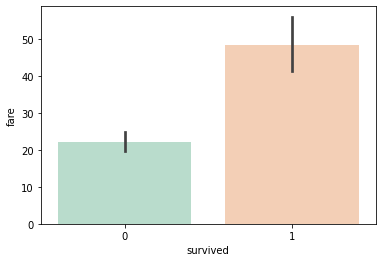

In [94]:
sns.barplot(y='fare',x='survived',data=ti,palette = "Pastel2")

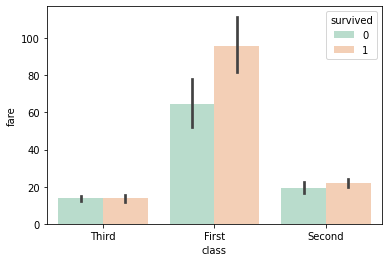

In [95]:
sns.barplot(x='class',y='fare',hue='survived',data=ti,palette = "Pastel2")

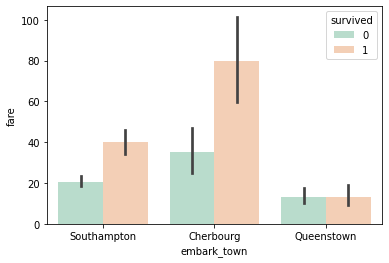

In [98]:
sns.barplot(y='fare',x='embark_town',hue='survived',data=ti,palette = "Pastel2")

### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


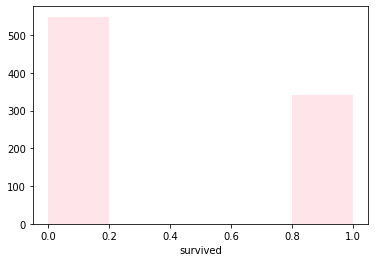

In [99]:
sns.distplot(ti['survived'],kde=False,color='Pink')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


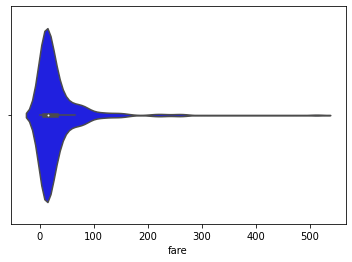

In [104]:
sns.violinplot(ti['fare'],color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


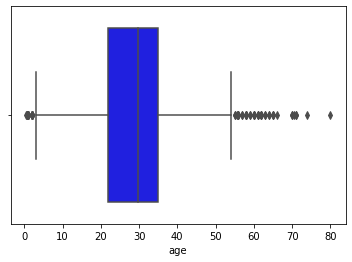

In [103]:
sns.boxplot(ti['age'],color='blue')

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

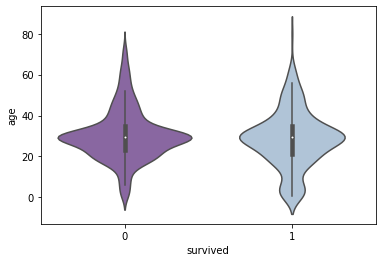

In [106]:
sns.violinplot(x='survived',y='age',data=ti, palette='BuPu_r')

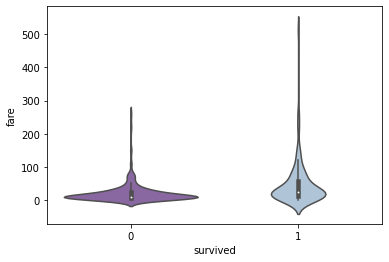

In [109]:
sns.violinplot(x='survived',y='fare',data=ti, palette='BuPu_r')


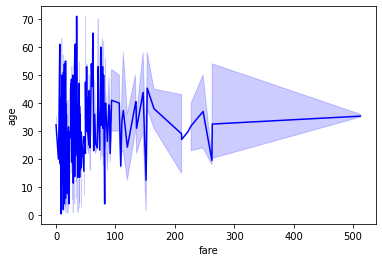

In [111]:
sns.lineplot(x='fare',y='age',data=ti, color='blue')

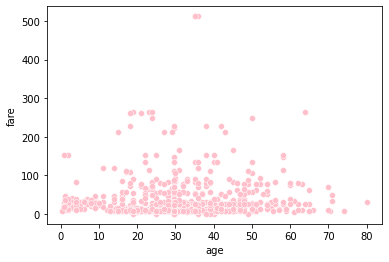

In [112]:
sns.scatterplot(x='age',y='fare',data=ti,color='pink')

In [113]:
ti[["age","sex"]].groupby(ti.age>18).sum()

,age
age,
False,1489.670000
True,24972.243824
